In [ ]:
import random as rd

Variant = 20
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(14),3)]
Numbers_of_problems

[12, 11, 3]

# file.asm



```
;Function exit
exit:
    mov rax,1
    mov rbx,0
    int 0x80

;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;The function prints minus
print_minus:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, '-'
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx
    xor rcx,rcx
    xor r8, r8
    cmp byte [rsi], '-'
    jne     .loop
    mov     r8, 1
    inc     rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je .restore
    mov     rbx, 10
    div     rbx
    
.restore:
    pop rbx
    pop rcx
    cmp r8, 1
    jne .end
    neg rax
.end:
ret

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;Function printing of string with fixed length
;input rsi - place of memory of begin string, rdx - length
print_str_fixed:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, 1
    mov rdi, 1
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret
;Function printing of char
;input rax - char
print_char:
    push rdi
    push rsi
    push rdx
    push rcx
    push rbx
    push rax
    mov rsi, rsp
    mov rdx, 1
    mov rax, 1
    mov rdi, 1
    syscall
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of number
;input rax - place of memory of number
print_num:
    push rsi
    push rdi
    push rdx
    push rcx
    push rbx
    push rax
    cmp rax, 0
    jnl @f
    call print_minus
    neg rax
    @@:
    xor rbx, rbx
    mov rbx, 10
    xor rcx, rcx
    .div_loop:
        xor rdx, rdx
        div rbx
        add rdx, '0'
        push rdx
        inc rcx
        cmp rax, 0
        jne .div_loop
    .print_loop:
        xor rax, rax
        pop rax
        call print_char
        dec rcx
        cmp rcx, 0
        jne .print_loop
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rsi
    ret

;Function reading of string
;input rsi - place of memory to place string, rdx - length
;output rsi
read:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, 0
    mov rdi, 0
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;macro prepares to use 'print_str_fixed' function
;op1 - place of memory of begin string, op2 - length
macro load_fixed_print op1, op2
{
    mov rsi, op1
    mov rdx, op2
}

;multiplication for 2 operands
macro mul2 op1, op2
{
    push rax
    push rbx
    mov rax, op1
    mov rbx, op2
    mul rbx
    mov op1, rax
    pop rbx
    pop rax
}
```



# Задача 12
Реализовать функцию, которая для заданного числа n определяет, что все его цифры следуют в неубывающем порядке.



```
format ELF64

public _start

include 'file.asm'

section '.bss' writable
    input: times 10 db ?
    positive db "True"
    negative db "False"

section '.text' executable
_start:
    mov rsi, input
    mov rdx, 10
    call read
    call str_number
    xor rbx, rbx
    mov rbx, 10
    xor rcx, rcx
    .div_loop:
        xor rdx, rdx
        div rbx
        push rdx
        inc rcx
        cmp rax, 0
        jne .div_loop
    pop rax
    jmp @f
    .cmp_loop:
        mov rdx, rax
        pop rax
        cmp rax, rdx
        jnl @f
        load_fixed_print negative, 5
        jmp .finish
        @@:
        dec rcx
        cmp rcx, 0
        jne .cmp_loop
        load_fixed_print positive, 4
    .finish:
        call print_str_fixed
        call new_line
        call exit
```



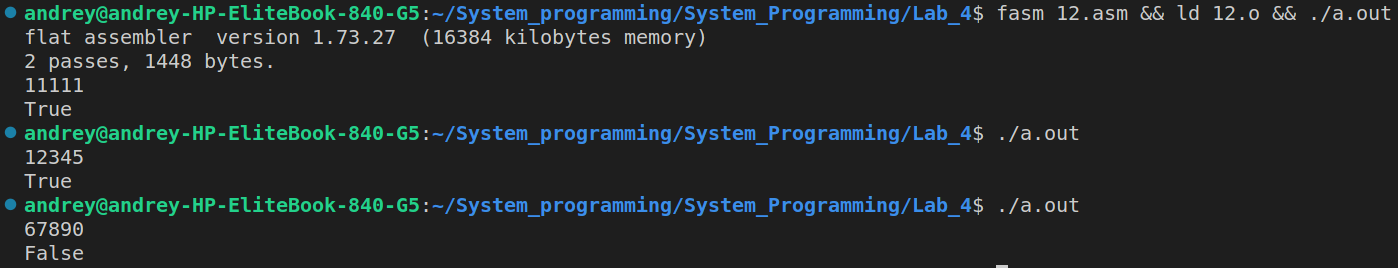

# Задача 11
Команда из n судей принимает решение большинством голосов. Каждый судья должен проголосовать, ответив "Да" (1), или "Нет" (0). Реализовать программу, которая помогает судьям принять окончательное решение.



```
format ELF64

public _start

include 'file.asm'

section '.bss' writable
    input: times 3 db ?
    positive db "Yes"
    negative db "No"
    neutral db "Equal"

section '.text' executable
_start:
    mov rsi, input
    mov rdx, 4
    call read
    call str_number
    xor rcx, rcx
    mov rcx, rax
    xor rbx, rbx
    mov rdx, 2
    .count_loop:
        call read
        inc rbx
        cmp byte [rsi], '0'
        jne @f
        sub rbx, 2
        @@:
        dec rcx
        cmp rcx, 0
        jne .count_loop
    cmp rbx, 0
    jne @f
    load_fixed_print neutral, 5
    jmp .finish
    @@:
    jl @f
    load_fixed_print positive, 3
    jmp .finish
    @@:
    load_fixed_print negative, 2
    .finish:
        call print_str_fixed
        call new_line
        call exit
```



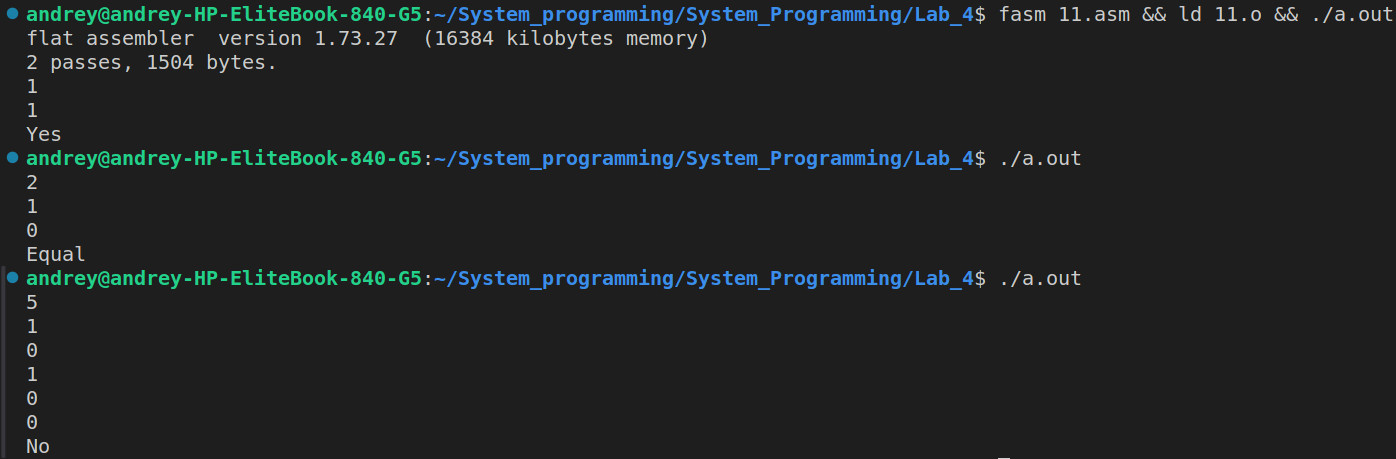

# Задача 3
Написать программу, которая для заданного n вычисляет сумму:

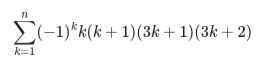



```
format ELF64

public _start
public func

include 'file.asm'

section '.bss' writable
    input: times 10 db ?
    number dq ?

section '.text' executable
_start:
    mov rsi, input
    mov rdx, 10
    call read
    call str_number
    inc rax
    mov [number], rax
    mov rcx, 1
    xor rbx, rbx
    xor rdx, rdx
    .sum_loop:
        call func
        cmp rdx, 0
        jne .add
            sub rbx, rax
            inc rdx
            jmp @f
        .add:
            add rbx, rax
            dec rdx
            jmp @f
        @@:
        inc rcx
        cmp rcx, [number]
        jne .sum_loop
    mov rax, rbx
    call print_num
    call new_line
    call exit

;input - rcx = k , output - rax
;rax = k * (k + 1) * (3k + 1) * (3k + 2)
func:
    push rcx
    push rdx
    ; k
    mov rax, rcx
    ; k + 1
    inc rcx
    mul rcx
    ; 3k + 1
    dec rcx
    mul2 rcx, 3
    inc rcx
    mul rcx
    ; 3k + 2
    inc rcx
    mul rcx
    pop rdx
    pop rcx
    ret

    
```



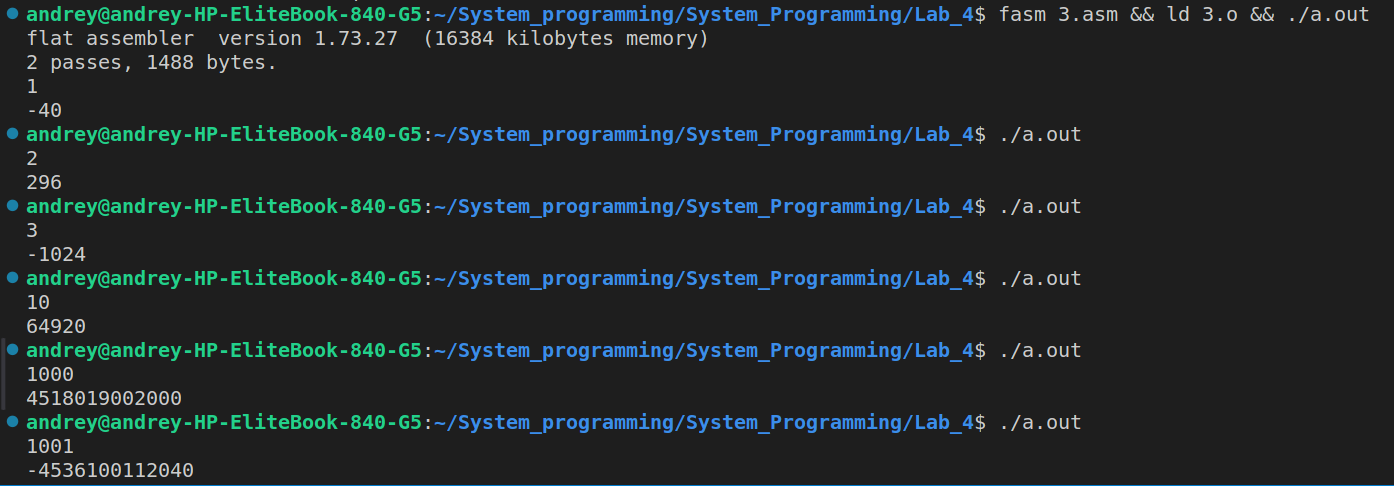